In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from typing import List
import numpy as np
import pandas as pd

import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

from gaussian_model import LinearKernel, ConstantKernel
from gaussian_model import ExponentialKernel, PeriodicKernel
from gaussian_model import WhiteNoiseKernel, GaussKernel
from gaussian_model import Gaussian_Process_Regression

from sklearn.gaussian_process import kernels
from sklearn.gaussian_process import GaussianProcessRegressor

%matplotlib inline
%matplotlib ipympl

ite:1  Abs Err:1015.9763843983176  x_new:(np.float64(0.9998900098991093), np.float64(0.9998900098991093), np.float64(0.9998900098991093), np.float64(0.9998900098991093), np.float64(0.9998900098991093), np.float64(0.9999100080992711), np.float64(0.9999100080992711), np.float64(0.9999100080992711), np.float64(0.9999100080992711), np.float64(0.49999000005000005))
ite:1001  Abs Err:9162.78696544217  x_new:(np.float64(0.6425221184518746), np.float64(0.6356306910920715), np.float64(0.45736856667219583), np.float64(0.5579256953994859), np.float64(0.6546769644515186), np.float64(0.7925171715512883), np.float64(0.9780725716374616), np.float64(0.6947024845205133), np.float64(0.8024006159847399), np.float64(0.021259216408780205))
ite:2001  Abs Err:53471.622210538444  x_new:(np.float64(0.5894385241485008), np.float64(0.580200863660803), np.float64(0.3346434622729272), np.float64(0.13096025503754355), np.float64(0.6250324270050202), np.float64(0.8374510165683379), np.float64(0.9831434099499081), np

/Users/h_nagino/work/github/Leaning_Gaussian_kernel/gaussian_model.py:908: RuntimeWarning: invalid value encountered in sqrt
  y_std = np.sqrt(y_var)


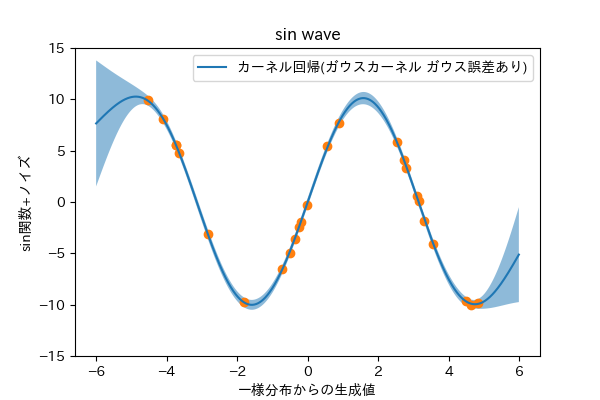

In [8]:
def wave_dataset(size:int, xlim:List=[0, 1], scale:float|None=None) -> pd.DataFrame:
    x = np.random.uniform(xlim[0], xlim[1], size)
    y = 10*np.sin(x)
    if scale is not None:
        noize = np.random.normal(0, scale, size)
        y = y + noize
    df = pd.DataFrame()
    df['x'] = x
    df['y'] = y
    return df

train_num  = 25
train_data = wave_dataset(train_num, xlim=[-5, 5], scale=0.1)
X_axis     = np.arange(-6, 6, 0.01)


kernel = LinearKernel(alpha=1) + ConstantKernel(alpha=1)\
		 + ExponentialKernel(alpha=1, beta=1)\
		 + PeriodicKernel(alpha=1, beta=1, gamma=1)\
         + GaussKernel(alpha=1, beta=1)\
         + WhiteNoiseKernel(alpha=1)
model  = Gaussian_Process_Regression(
    		train_data['x'].values.reshape((-1, 1)), 
            train_data['y'].values.reshape((-1, 1)),
            kernel=kernel, 
            norm_α=10, 
            l1_ratio=0.1, 
            eta=1e-5, 
            tol=1e-6, 
            max_iterate=100000)
# solver = "external library"
# solver = "ISTA"
solver = "OPTIMIZER"
model.fit(solver=solver, useRAdam=False)

pred_mean, pred_std = model.predict(X_axis.reshape((-1, 1)), return_std=True)
pred_mean = pred_mean.reshape(-1)

# データを描画
plt.figure(figsize=(6, 4))
plt.plot(X_axis, pred_mean, label='カーネル回帰(ガウスカーネル ガウス誤差あり)')
plt.fill_between(X_axis, pred_mean - 3*pred_std, pred_mean + 3*pred_std, alpha=0.5)
plt.scatter(train_data['x'].values, train_data['y'].values, marker='o')
plt.title('sin wave')
plt.xlabel('一様分布からの生成値')
plt.ylabel('sin関数+ノイズ')
plt.ylim((-1.5*10, 1.5*10))
plt.legend()
plt.show()

In [ ]:
kernel.get_theta()